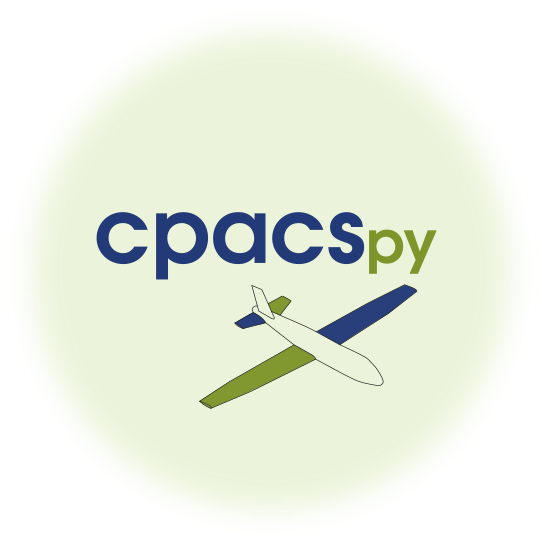

cpacspy
=========

cpacspy is a Python package to read, write, interact and analyse
[CPACS](https://www.cpacs.de/) files and esspecially AeroPerformanceMaps.

Installation
-----------------

You need to have [TIXI](https://github.com/DLR-SC/tixi) and
[TIGL](https://github.com/DLR-SC/tigl) install on your computer to use
this package. The easiest way is to use a Conda environment, to create
one:

-   Install Miniconda: <https://docs.conda.io/en/latest/miniconda.html>
-   Clone this repository and create a Conda environment with the
    following command:

``` {.sourceCode .bash}
$ git clone https://github.com/cfsengineering/cpacspy.git
$ cd cpacspy
$ conda env create -f environment.yml
$ conda activate cpacspy_env
```

-   When it is done or if you already have TIXI and TIGL install on your
    computer:

``` {.sourceCode .bash}
$ pip install cpacspy
```

To build and install locally
------------------------------

``` {.sourceCode .bash}
$ cd cpacspy
$ python -m build
$ pip install --user .
```

License
-------------

**License:** Apache-2.0

How to use this package
-------------------------------------

Follow the example bellow:

In [1]:
import sys
sys.path.append('../src/')

# Importing cpacspy
from cpacspy.cpacspy import CPACS

In [2]:
# Load a CPACS file
cpacs = CPACS('D150_simple.xml')

TIXI handle has been created for D150_simple.xml.


WRN 11/14 13:47:21 CPACSPositioning.cpp:111] Optional element fromSectionUID is present but empty at xpath /cpacs/vehicles/aircraft/model/fuselages/fuselage[1]/positionings/positioning[1]
WRN 11/14 13:47:21 CPACSPositioning.cpp:111] Optional element fromSectionUID is present but empty at xpath /cpacs/vehicles/aircraft/model/wings/wing[1]/positionings/positioning[1]
WRN 11/14 13:47:21 CPACSPositioning.cpp:111] Optional element fromSectionUID is present but empty at xpath /cpacs/vehicles/aircraft/model/wings/wing[2]/positionings/positioning[1]
WRN 11/14 13:47:21 CPACSPositioning.cpp:68] Required element name is empty at xpath /cpacs/vehicles/aircraft/model/wings/wing[3]/positionings/positioning[1]
WRN 11/14 13:47:21 CPACSPositioning.cpp:111] Optional element fromSectionUID is present but empty at xpath /cpacs/vehicles/aircraft/model/wings/wing[3]/positionings/positioning[1]
WRN 11/14 13:47:21 CPACSPositioning.cpp:68] Required element name is empty at xpath /cpacs/vehicles/aircraft/model/

In [5]:
# For each object you can print it to see what it contains or use 'help(...)' to see associated functions
print(cpacs)


CPACS file ----------------------------------------------------------
 
Aircraft name : D150
CPACS file path: D150_simple.xml
 
List of AeroMaps:
  aeromap_test1
  aeromap_test2
  extended_aeromap
  aeromap_test_dampder
 
---------------------------------------------------------------------



In [6]:
print(cpacs.aircraft)


Aircraft data -------------------------------------------------------
 
Reference length: 	4.193 [m]
Reference area: 	122.4 [m^2]
Reference point: 	(0.0,0.0,0.0) [m]
 
Reference wing index: 	1
Wing span: 		33.91312573582538 [m]
Wing area: 		130.51295241980267 [m^2]
Wing AR: 		9.401959556606595 [-]
 
---------------------------------------------------------------------



In [7]:
help(cpacs)

Help on CPACS in module cpacspy.cpacspy object:

class CPACS(builtins.object)
 |  CPACS(cpacs_file)
 |  
 |  CPACS class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cpacs_file)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  create_aeromap(self, uid)
 |      Create a new aeromap object.
 |  
 |  create_aeromap_from_csv(self, csv_path, uid=None)
 |      Create a new aeromap object from a CSV file.
 |  
 |  delete_aeromap(self, uid)
 |      Delete an aeromap from its uid.
 |  
 |  duplicate_aeromap(self, uid_base, uid_duplicate)
 |      Duplicate an aeromap and return the new aeromap object.
 |  
 |  get_aeromap_by_uid(self, uid)
 |      Get an aeromap object by its uid.
 |  
 |  get_aeromap_uid_list(self)
 |      Get the list of all aeroMap UID.
 |  
 |  load_all_aeromaps(self)
 |      Load all the aeromaps present in the CPACS file as object.
 |  
 |  save_cpacs(self, cpacs_file, overwrite=False

Aircraft value
---------------

In [8]:
cpacs.aircraft.ref_length

4.193

In [9]:
cpacs.aircraft.ref_area


122.4

In [10]:
(cpacs.aircraft.ref_point_x,cpacs.aircraft.ref_point_y,cpacs.aircraft.ref_point_z)

(0.0, 0.0, 0.0)

Wing value
------------
(by default the largest wing is the reference one)

In [11]:
cpacs.aircraft.wing_ar

9.401959556606595

In [12]:
cpacs.aircraft.wing_span

33.91312573582538

In [13]:
cpacs.aircraft.wing_area

130.51295241980267

In [14]:
# You can also change the reference wing by its index
cpacs.aircraft.ref_wing_idx = 3 

cpacs.aircraft.wing_area

46.59527417254551

In [15]:
# or by its uid
cpacs.aircraft.ref_wing_uid = 'Wing2H'

cpacs.aircraft.wing_area

32.76173830047115

AeroMaps
--------------

In [16]:
# Get list of all available aeroMaps
cpacs.get_aeromap_uid_list()

['aeromap_test1', 'aeromap_test2', 'extended_aeromap', 'aeromap_test_dampder']

In [17]:
# or loop through all aeroMaps
for aeromap in cpacs.aeromaps:
    print('---')
    print(aeromap.uid)
    print(aeromap.description)

---
aeromap_test1
Common default aeroMap
---
aeromap_test2
Common default aeroMap
---
extended_aeromap
Description of the extended_aeromap
---
aeromap_test_dampder
AeroMap to test function related to damping derivatives coefficients function, errrors in the aeroMap are the folloing: missing dcsdrStar for positiveRates, only nan for dcsdrStar negativeRates


In [18]:
# Get a specific aeromap from its uid
ext_aeromap = cpacs.get_aeromap_by_uid('extended_aeromap')
print(ext_aeromap)


AeroMap Description -------------------------------------------------

AeroMap uid: extended_aeromap
AeroMap xpath: /cpacs/vehicles/aircraft/model/analyses/aeroPerformance/aeroMap[3]/aeroPerformanceMap
AeroMap description: Description of the extended_aeromap
Atmospheric model: ISA

Number of states: 		96
Unique altitude: 		0.0, 10000.0, 15500.0
Unique Mach number: 		0.1, 0.3, 0.5, 0.7
Unique angle of sideslip:  	0.0
Unique angle of attack: 	-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0

Parameters and coefficients:
    altitude  machNumber  angleOfSideslip  angleOfAttack        cd        cl  \
0        0.0         0.1              0.0           -6.0  0.004307 -0.213923   
1        0.0         0.1              0.0           -4.0  0.002530 -0.004477   
2        0.0         0.1              0.0           -2.0  0.002332  0.204856   
3        0.0         0.1              0.0            0.0  0.003700  0.413917   
4        0.0         0.1              0.0            2.0  0.006615  0.622573   
..

In [19]:
# Get specific values
ext_aeromap.get('angleOfAttack',alt=15500.0,aos=0.0,mach=0.3)

array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.])

In [20]:
ext_aeromap.get('cl',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5])

array([-0.213923  , -0.00447686,  0.204856  ,  0.413917  ,  0.622573  ,
        0.830741  ,  1.03842   ,  1.24558   , -0.213923  , -0.00447686,
        0.204856  ,  0.413917  ,  0.622573  ,  0.830741  ,  1.03842   ,
        1.24558   ])

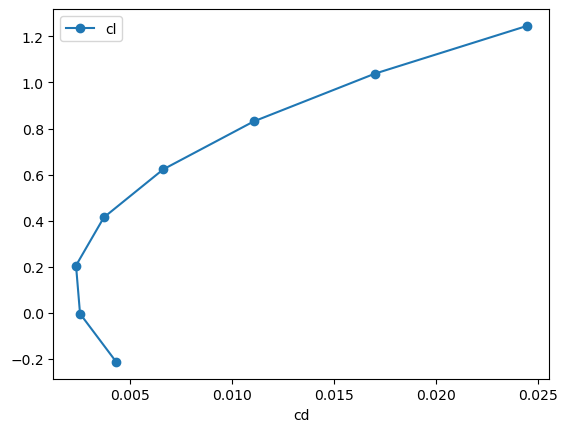

In [21]:
# Plot values from the aeromap
ext_aeromap.plot('cd','cl',alt=15500,aos=0.0,mach=0.5)

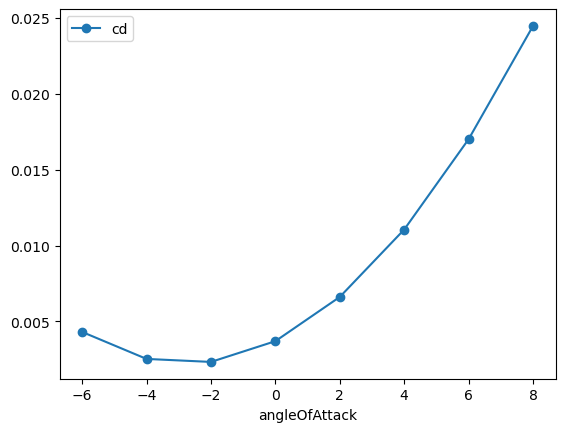

In [22]:
ext_aeromap.plot('angleOfAttack','cd',alt=15500,aos=0.0,mach=0.5)

In [23]:
# Create new aeromap 
new_aeromap = cpacs.create_aeromap('my_new_aeromap')
new_aeromap.description = 'Test the creation of a new aeromap'

In [24]:
# Add a values into the new aeromap
new_aeromap.add_row(mach=0.555,alt=15000,aos=0.0,aoa=0,cd=0.001,cl=0.1,cs=0.0,cmd=0.0,cml=1.1,cms=0.0)

In [25]:
# Remove a row from its paramters
new_aeromap.remove_row(mach=0.555,alt=15000,aos=0.0,aoa=0)

In [26]:
# Add a values into the new aeromap
for i in range(12):
    new_aeromap.add_row(mach=0.555,alt=15000,aos=0.0,aoa=i,cd=0.001*i*i,cl=0.1*i,cs=0.0,cmd=0.0,cml=1.1,cms=0.0)

In [27]:
print(new_aeromap)


AeroMap Description -------------------------------------------------

AeroMap uid: my_new_aeromap
AeroMap xpath: None
AeroMap description: Test the creation of a new aeromap
Atmospheric model: ISA

Number of states: 		12
Unique altitude: 		15000.0
Unique Mach number: 		0.555
Unique angle of sideslip:  	0.0
Unique angle of attack: 	0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0

Parameters and coefficients:
    altitude  machNumber  angleOfSideslip  angleOfAttack     cd   cl   cs  \
0    15000.0       0.555              0.0            0.0  0.000  0.0  0.0   
1    15000.0       0.555              0.0            1.0  0.001  0.1  0.0   
2    15000.0       0.555              0.0            2.0  0.004  0.2  0.0   
3    15000.0       0.555              0.0            3.0  0.009  0.3  0.0   
4    15000.0       0.555              0.0            4.0  0.016  0.4  0.0   
5    15000.0       0.555              0.0            5.0  0.025  0.5  0.0   
6    15000.0       0.555           

In [28]:
# Save the new aeromap
new_aeromap.save()

In [29]:
# Delete an aeromap
cpacs.delete_aeromap('aeromap_test1')
cpacs.get_aeromap_uid_list()

['aeromap_test2', 'extended_aeromap', 'aeromap_test_dampder', 'my_new_aeromap']

In [30]:
# Duplicate an aeromap
duplicated_aeromap = cpacs.duplicate_aeromap('my_new_aeromap', 'my_duplicated_aeromap')
duplicated_aeromap.add_row(mach=0.666,alt=10000,aos=0.0,aoa=2.4,cd=0.001,cl=1.1,cs=0.22,cmd=0.22)

In [31]:
print(duplicated_aeromap)


AeroMap Description -------------------------------------------------

AeroMap uid: my_duplicated_aeromap
AeroMap xpath: None
AeroMap description: Test the creation of a new aeromap (duplicate from "my_new_aeromap")
Atmospheric model: ISA

Number of states: 		13
Unique altitude: 		15000.0, 10000.0
Unique Mach number: 		0.555, 0.666
Unique angle of sideslip:  	0.0
Unique angle of attack: 	0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 2.4

Parameters and coefficients:
    altitude  machNumber  angleOfSideslip  angleOfAttack     cd   cl    cs  \
0    15000.0       0.555              0.0            0.0  0.000  0.0  0.00   
1    15000.0       0.555              0.0            1.0  0.001  0.1  0.00   
2    15000.0       0.555              0.0            2.0  0.004  0.2  0.00   
3    15000.0       0.555              0.0            3.0  0.009  0.3  0.00   
4    15000.0       0.555              0.0            4.0  0.016  0.4  0.00   
5    15000.0       0.555              0.0   

In [32]:
# Coefficient are stored in a Pandas DataFrame, so you can apply any operation on it
duplicated_aeromap.df['cd'] = duplicated_aeromap.df['cd'].apply(lambda x: x*2-0.2)
duplicated_aeromap.get('cd')

array([-0.2  , -0.198, -0.192, -0.182, -0.168, -0.15 , -0.128, -0.102,
       -0.072, -0.038,  0.   ,  0.042, -0.198])

In [33]:
# Export to a CSV file
duplicated_aeromap.export_csv('aeromap.csv')

In [34]:
# Import from CSV
imported_aeromap = cpacs.create_aeromap_from_csv('aeromap.csv','imported_aeromap')
imported_aeromap.description = 'This aeromap has been imported from a CSV file'
imported_aeromap.save()

In [35]:
print(imported_aeromap)


AeroMap Description -------------------------------------------------

AeroMap uid: imported_aeromap
AeroMap xpath: /cpacs/vehicles/aircraft/model/analyses/aeroPerformance/aeroMap[5]/aeroPerformanceMap
AeroMap description: This aeromap has been imported from a CSV file
Atmospheric model: ISA

Number of states: 		13
Unique altitude: 		15000, 10000
Unique Mach number: 		0.555, 0.666
Unique angle of sideslip:  	0
Unique angle of attack: 	0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 2.4

Parameters and coefficients:
    altitude  machNumber  angleOfSideslip  angleOfAttack     cd   cl    cs  \
0      15000       0.555                0            0.0 -0.200  0.0  0.00   
1      15000       0.555                0            1.0 -0.198  0.1  0.00   
2      15000       0.555                0            2.0 -0.192  0.2  0.00   
3      15000       0.555                0            3.0 -0.182  0.3  0.00   
4      15000       0.555                0            4.0 -0.168  0.4  0.00

In [36]:
# AeroMap with damping derivatives coefficients
aeromap_dd = cpacs.duplicate_aeromap('imported_aeromap','aeromap_dd')
aeromap_dd.description = 'Aeromap with damping derivatives coefficients'
print(aeromap_dd)


AeroMap Description -------------------------------------------------

AeroMap uid: aeromap_dd
AeroMap xpath: None
AeroMap description: Aeromap with damping derivatives coefficients
Atmospheric model: ISA

Number of states: 		13
Unique altitude: 		15000, 10000
Unique Mach number: 		0.555, 0.666
Unique angle of sideslip:  	0
Unique angle of attack: 	0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 2.4

Parameters and coefficients:
    altitude  machNumber  angleOfSideslip  angleOfAttack     cd   cl    cs  \
0      15000       0.555                0            0.0 -0.200  0.0  0.00   
1      15000       0.555                0            1.0 -0.198  0.1  0.00   
2      15000       0.555                0            2.0 -0.192  0.2  0.00   
3      15000       0.555                0            3.0 -0.182  0.3  0.00   
4      15000       0.555                0            4.0 -0.168  0.4  0.00   
5      15000       0.555                0            5.0 -0.150  0.5  0.00   
6     

In [37]:
# Add damping derivatives coefficients to the aeromap
aeromap_dd.add_damping_derivatives(alt=15000,mach=0.555,aos=0.0,aoa=0.0,coef='cd',axis='dp',value=0.001,rate=-1.0)

- Coefficients must be one of the following: 'cd', 'cl', 'cs', 'cmd', 'cml', 'cms'

- Axis must be one of the following: 'dp', 'dq', 'dr'

- The sign of the rate will determine if the coefficient are stored in /positiveRate or /negativeRate

In [38]:
# Could be added in a loop
for i in range(11):
    aeromap_dd.add_damping_derivatives(alt=15000,mach=0.555,aos=0.0,aoa=i+1,coef='cd',axis='dp',value=0.001*i+0.002,rate=-1.0)
aeromap_dd.save()

In [39]:
aeromap_dd.df

,altitude,machNumber,angleOfSideslip,angleOfAttack,cd,cl,cs,cmd,cml,cms,dampingDerivatives_negativeRates_dcddpStar
0,15000,0.555,0,0.0,-0.200,0.0,0.00,0.00,1.1,0,0.001
1,15000,0.555,0,1.0,-0.198,0.1,0.00,0.00,1.1,0,0.002
2,15000,0.555,0,2.0,-0.192,0.2,0.00,0.00,1.1,0,0.003
3,15000,0.555,0,3.0,-0.182,0.3,0.00,0.00,1.1,0,0.004
4,15000,0.555,0,4.0,-0.168,0.4,0.00,0.00,1.1,0,0.005
5,15000,0.555,0,5.0,-0.150,0.5,0.00,0.00,1.1,0,0.006
6,15000,0.555,0,6.0,-0.128,0.6,0.00,0.00,1.1,0,0.007
7,15000,0.555,0,7.0,-0.102,0.7,0.00,0.00,1.1,0,0.008
8,15000,0.555,0,8.0,-0.072,0.8,0.00,0.00,1.1,0,0.009
9,15000,0.555,0,9.0,-0.038,0.9,0.00,0.00,1.1,0,0.010


In [40]:
# Get damping derivatives coefficients
aeromap_dd.get_damping_derivatives(alt=15000,mach=0.555,coef='cd',axis='dp',rates='neg')

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012])

In [41]:
aeromap_dd.get_damping_derivatives(alt=15000,mach=0.555,aoa=[4.0,6.0,8.0],coef='cd',axis='dp',rates='neg')

array([0.005, 0.007, 0.009])

In [42]:
# Also works with the simple "get" function, but the "coef name" is a bit more complicated
aeromap_dd.get('dampingDerivatives_negativeRates_dcddpStar',aoa=[4.0,6.0,8.0])

array([0.005, 0.007, 0.009])

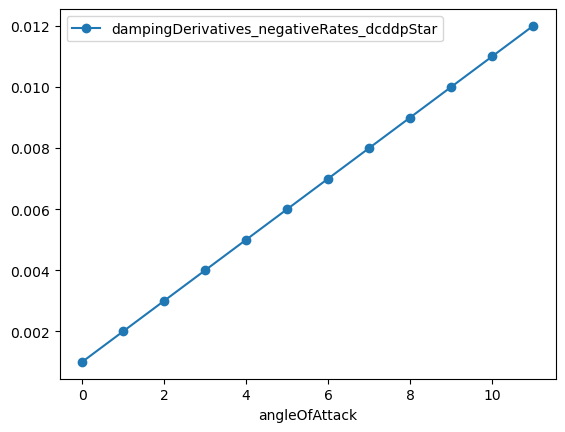

In [43]:
# Damping derivatives coefficients can alos be plotted
aeromap_dd.plot('angleOfAttack','dampingDerivatives_negativeRates_dcddpStar',alt=15000,aos=0.0,mach=0.555)

Analyses
-----------

In [44]:
# CD0 and oswald factor
ar = cpacs.aircraft.wing_ar
cd0,e = ext_aeromap.get_cd0_oswald(ar,alt=15500.0,aos=0.0,mach=0.5)

---------------------------------------------
For alt=15500.0m, Mach=0.5, AoS=0.0deg:
CD0: 0.001196
Oswald factor: 4.3019
---------------------------------------------


In [45]:
# Get Forces [N]
ext_aeromap.calculate_forces(cpacs.aircraft)
print(ext_aeromap.get('cd',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5]))
print(ext_aeromap.get('drag',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5]))

[0.00430734 0.00252977 0.0023323  0.00370036 0.00661524 0.0110576
 0.0170133  0.0244752  0.00430734 0.00252977 0.0023323  0.00370036
 0.00661524 0.0110576  0.0170133  0.0244752 ]
[ 371.93015423  218.44055642  201.38941869  319.51865084  571.21268195
  954.80154189 1469.06427006 2113.38434181 1033.13931731  606.77932338
  559.41505193  887.55180789 1586.70189431 2652.22650524 4080.73408349
 5870.51206057]


In [49]:
# Check stability
stable, msg = ext_aeromap.check_longitudinal_stability(alt=15500.0, aos=0.0, mach=0.5)
stable

True

In [53]:
stable, msg = ext_aeromap.check_directional_stability(alt=15500.0, aoa=0.0, mach=0.5)
msg

'Not enough value to check stability'

In [54]:
stable, msg = ext_aeromap.check_lateral_stability(alt=15500.0, aoa=0.0, mach=0.5)
msg

'Not enough value to check stability'

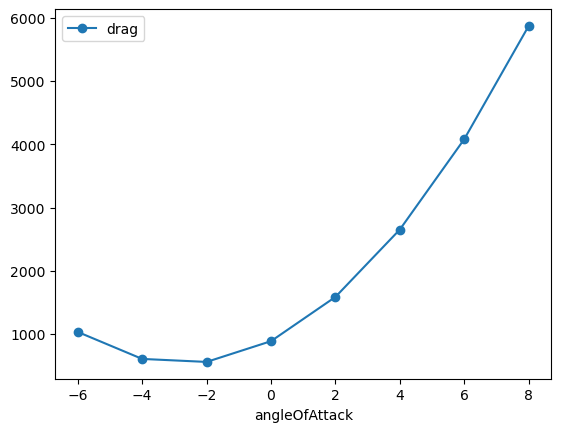

In [55]:
ext_aeromap.plot('angleOfAttack','drag',alt=15500,aos=0.0,mach=0.5)

In [56]:
ext_aeromap.df

,altitude,machNumber,angleOfSideslip,angleOfAttack,cd,cl,cs,cmd,cml,cms,drag,lift,side,md,ml,ms
0,0.0,0.1,0.0,-6.0,0.004307,-0.213923,2.943620e-06,-0.000034,5.393510e-06,0.113345,373.942842,-18571.780865,0.255551,-12.549319,1.963326,41259.437178
1,0.0,0.1,0.0,-4.0,0.002530,-0.004477,2.168690e-06,-0.000025,3.131000e-06,0.079106,219.622640,-388.659765,0.188275,-8.921641,1.139735,28795.807363
2,0.0,0.1,0.0,-2.0,0.002332,0.204856,1.434160e-06,-0.000015,1.567660e-06,0.045091,202.479231,17784.626903,0.124507,-5.470766,0.570654,16413.826423
3,0.0,0.1,0.0,0.0,0.003700,0.413917,6.944300e-07,-0.000006,5.321090e-07,0.011375,321.247715,35934.311973,0.060287,-2.219772,0.193696,4140.577177
4,0.0,0.1,0.0,2.0,0.006615,0.622573,-3.617770e-08,0.000002,1.679020e-08,-0.022080,574.303781,54048.836864,-0.003141,0.792209,0.006112,-8037.408981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,15500.0,0.7,0.0,0.0,0.003700,0.413917,6.944300e-07,-0.000006,5.321090e-07,0.011375,1739.601543,194589.351324,0.326463,-12.020377,1.048893,22421.807533
92,15500.0,0.7,0.0,2.0,0.006615,0.622573,-3.617770e-08,0.000002,1.679020e-08,-0.022080,3109.935713,292682.050319,-0.017008,4.289922,0.033097,-43523.699610
93,15500.0,0.7,0.0,4.0,0.011058,0.830741,-7.555850e-07,0.000010,-2.604530e-08,-0.055471,5198.363950,390545.332297,-0.355213,19.239305,-0.051340,-109344.429800
94,15500.0,0.7,0.0,6.0,0.017013,1.038420,-1.464180e-06,0.000017,3.504100e-07,-0.089231,7998.238804,488178.727141,-0.688336,32.872321,0.690728,-175892.926993


Save the CPACS file

In [57]:
# Save all the change in a CPACS file
cpacs.save_cpacs('D150_simple_updated_aeromap_tmp.xml',overwrite=True)






Futur improvements
-----------------------

* Add possiblity to store incrementMaps (Control surface, landing gear, etc
* Add more aerodynamics analysis
* Interpolation (surrogate?) between existing points

Open source project
-----------------------

If you are interested to participate to the development of cpacspy let me know.

* https://github.com/cfsengineering/cpacspy